## This notebook is used for Data Exploration

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',header=0)
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [55]:
#Exploring the severity of the collision included in the data set
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [56]:
#It seemed liked the dataset only included only two level of severity, let's look at their descpriction
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [57]:
#So it looks like the dataset only specifies 2 type of severity which are injury and not-injury
#In this project, I will chooses several facor such as COLLISIONTYPE, WEATHER, ROADCOND,LIGHTCOND,
#INATTENTIONIND, UNDERINFL, SPEEDING as the main focus factors
#Let's build a data set contain those columns
df_new = df[['COLLISIONTYPE','WEATHER','ROADCOND',
             'LIGHTCOND','INATTENTIONIND','UNDERINFL','SPEEDING','SEVERITYCODE']]
df_new.dtypes

COLLISIONTYPE     object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
INATTENTIONIND    object
UNDERINFL         object
SPEEDING          object
SEVERITYCODE       int64
dtype: object

In [58]:
df_new['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [59]:
df_new['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [60]:
df_new['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [61]:
df_new['COLLISIONTYPE'].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [62]:
#Drop rows with null values
df_new = df_new.dropna(axis='rows')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 1320 to 194309
Data columns (total 8 columns):
COLLISIONTYPE     695 non-null object
WEATHER           695 non-null object
ROADCOND          695 non-null object
LIGHTCOND         695 non-null object
INATTENTIONIND    695 non-null object
UNDERINFL         695 non-null object
SPEEDING          695 non-null object
SEVERITYCODE      695 non-null int64
dtypes: int64(1), object(7)
memory usage: 48.9+ KB


In [63]:
#label encoded the dataset since all features are catogories types
categorical_cols = ['COLLISIONTYPE','WEATHER','ROADCOND',
             'LIGHTCOND','INATTENTIONIND','UNDERINFL','SPEEDING']
labelencoder = LabelEncoder()

In [82]:
df_new[categorical_cols] = df_new[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))
# z = np.abs(stats.zscore(df_new))
# print(z)

# threshold = 10
# print(np.where(z > 10))

# #Then, we create a new dataset which contains all the elements which is less than 3
# new_dataset_df_o = df_new[(z < 100).all(axis=1)]

In [83]:
df_new.head(10)

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE
1320,0,0,0,4,0,2,0,2
1572,0,0,0,4,0,2,0,1
2918,2,0,0,4,0,2,0,2
3045,4,6,2,4,0,2,0,2
3499,4,3,0,2,0,0,0,1
3517,7,4,5,2,0,2,0,2
3974,7,0,0,4,0,0,0,1
4472,5,0,0,4,0,0,0,2
4902,4,4,5,2,0,1,0,1
4969,7,0,0,4,0,0,0,2


In [93]:
X_dataset = df_new.drop('SEVERITYCODE', axis = 1)
y_dataset = df_new['SEVERITYCODE']

In [87]:
X_dataset.head(5)

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL,SPEEDING
1320,0,0,0,4,0,2,0
1572,0,0,0,4,0,2,0
2918,2,0,0,4,0,2,0
3045,4,6,2,4,0,2,0
3499,4,3,0,2,0,0,0


In [94]:
X_df = pd.get_dummies(X_dataset, dummy_na = False, columns=categorical_cols )

X_train, X_test, y_train, y_test = train_test_split(X_df, y_dataset, test_size=0.3, random_state = 0)

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [98]:
X_train.head()

,COLLISIONTYPE_0,COLLISIONTYPE_1,COLLISIONTYPE_2,COLLISIONTYPE_3,COLLISIONTYPE_4,COLLISIONTYPE_5,COLLISIONTYPE_6,COLLISIONTYPE_7,COLLISIONTYPE_8,COLLISIONTYPE_9,...,LIGHTCOND_4,LIGHTCOND_5,LIGHTCOND_6,LIGHTCOND_7,INATTENTIONIND_0,UNDERINFL_0,UNDERINFL_1,UNDERINFL_2,UNDERINFL_3,SPEEDING_0
50751,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
193524,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
80676,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
132254,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
138226,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [103]:
#Lineaer Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train_linear = regressor.predict(X_train)
# Predicting the Test set results
y_pred_test_linear = regressor.predict(X_test)

# # Visualising the Training set results
# plt.scatter(X_train['WEATHER'], y_train, color = 'red')
# plt.scatter(X_train['WEATHER'], regressor.predict(X_train), color = 'blue')
# plt.title('WEATHER vs SEVERITY (Training set)')
# plt.xlabel('WEATHER')
# plt.ylabel('SEVERITY')
# plt.show()

# # Visualising the Test set results
# plt.scatter(X_test['WEATHER'], y_test, color = 'red')
# plt.scatter(X_test['WEATHER'], regressor.predict(X_test), color = 'blue')
# plt.title('WEATHER vs SEVERITY (Test set)')
# plt.xlabel('WEATHER')
# plt.ylabel('SEVERITY')
# plt.show()
print("Error Training Set of Linear Regression Model", performance_metric(y_train,y_pred_train_linear))
print("Error Test Set of Linear Regression Model", performance_metric(y_test,y_pred_test_linear))

Error Training Set of Linear Regression Model 0.12415222274849247
Error Test Set of Linear Regression Model 0.04089843716426422


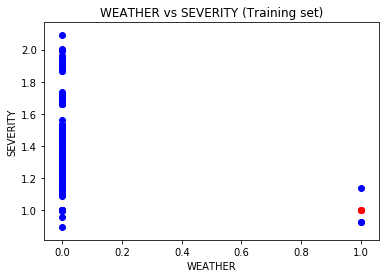

In [101]:
# Visualising the Training set results
plt.scatter(X_train['COLLISIONTYPE_8'], y_train, color = 'red')
plt.scatter(X_train['COLLISIONTYPE_8'], regressor.predict(X_train), color = 'blue')
plt.title('WEATHER vs SEVERITY (Training set)')
plt.xlabel('WEATHER')
plt.ylabel('SEVERITY')
plt.show()



In [102]:
# Decision Tree
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_d_tree = DecisionTreeRegressor()
regressor_d_tree.fit(X_train, y_train)

y_pred_train_d_tree = regressor_d_tree.predict(X_train)
# Predicting the Test set results
y_pred_test_d_tree = regressor_d_tree.predict(X_test)

# # Visualising the Training set results
# plt.scatter(X_train['Engine HP'], y_train, color = 'red')
# plt.scatter(X_train['Engine HP'], regressor_d_tree.predict(X_train), color = 'blue')
# plt.title('Engine HP vs MSRP DT (Training set)')
# plt.xlabel('Engine HP')
# plt.ylabel('MSRP')
# plt.show()
# # Visualising the Test set results
# plt.scatter(X_test['Engine HP'], y_test, color = 'red')
# plt.scatter(X_test['Engine HP'], regressor_d_tree.predict(X_test), color = 'blue')
# plt.title('Engine HP vs MSRP DT (Test set)')
# plt.xlabel('Engine HP')
# plt.ylabel('MSRP')
# plt.show()
print("Error Training Set of Decision Tree Model", performance_metric(y_train,y_pred_train_d_tree))
print("Error Test Set of Decision Tree Model", performance_metric(y_test,y_pred_test_d_tree))

Error Training Set of Decision Tree Model 0.36744974281120857
Error Test Set of Decision Tree Model -0.21588375728944498
